# CS5242 Final Project
## Predicting Online Shoppers’ Purchase Intentions

### Read data and import libraries

In [1]:
# import libaries
# data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

# visualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# feature selection
from sklearn.feature_selection import SelectKBest, chi2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
df = pd.read_csv('data/online_shoppers_intention.csv')
print(df.shape)
df.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Clean missing data

In [3]:
# clean missing data 
def missing_data(data):
    '''
    display of missing information per column
    '''
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

# categorical feature coersive conversion
# df['SpecialDay'] = df['SpecialDay'].astype('O')
# df['OperatingSystems'] = df['OperatingSystems'].astype('O')
# df['Browser'] = df['Browser'].astype('O')
# df['Region'] = df['Region'].astype('O')
# df['TrafficType'] = df['TrafficType'].astype('O')
# df['Revenue'] = df['Revenue'].astype(int)

# convenient vars for columns
feature_cols = df.columns.tolist()
feature_cols.remove('Revenue')
feature_obj_cols = df.select_dtypes('O').columns.tolist()
feature_num_cols = [x for x in feature_cols if x not in feature_obj_cols]

#show columnar missing values conditions
missing_data(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Total,14,14,14,14,14,14,14,14,0,0,0,0,0,0,0,0,0,0
Percent,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0,0,0,0,0,0,0,0,0,0
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64,int64,int64,int64,object,bool,bool


In [4]:
# fillna on the numerical columns, using mean
for col in df.select_dtypes(exclude='O').columns.tolist():
    df[col].fillna(df[col].mean(),inplace=True)
    
# check if the data contains any NULL values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Data exploration

### Dependent Variables

There are 15.47% target values with 1


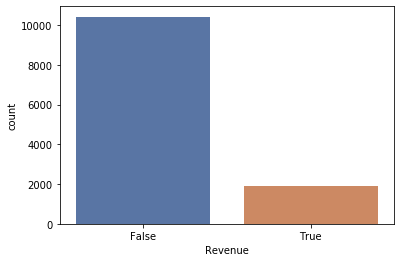

In [5]:
# Distribution of customers with Revenue 

sns_plot = sns.countplot(df['Revenue'], palette='deep')
sns_plot.figure.savefig('image/01_revenue.png')

print("There are {:.2%} target values with 1".format(df["Revenue"].value_counts()[1]/df.shape[0]))

### Independent Variables

### Numerial Variables

<Figure size 432x288 with 0 Axes>

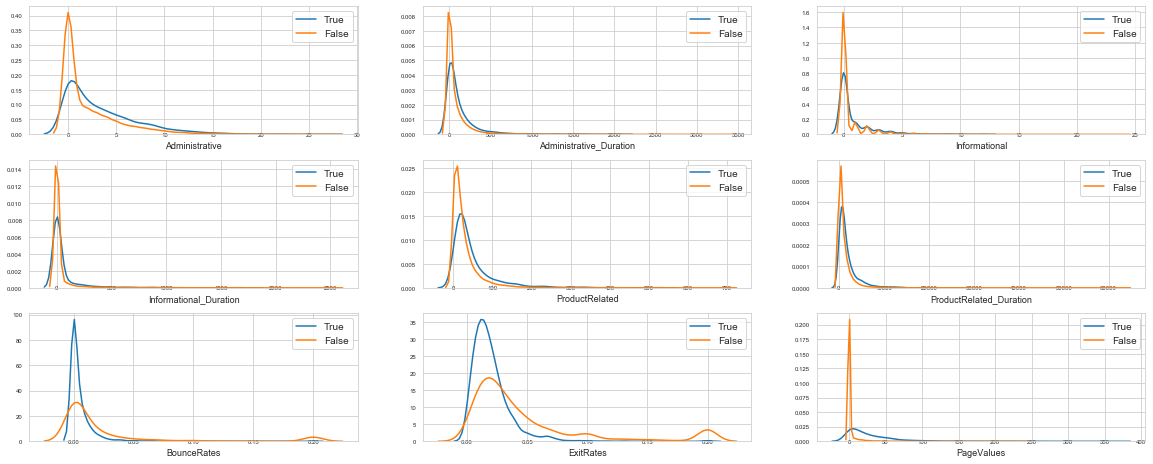

In [6]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(3,3,figsize=(20,8))

    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.savefig('image/02_pages.png')    
    plt.show()
    
revenue_y = df.loc[df['Revenue'] == True]
revenue_n = df.loc[df['Revenue'] == False]
features = df.columns.values[0:9]
plot_feature_distribution(revenue_y, revenue_n, 'True', 'False', features)    

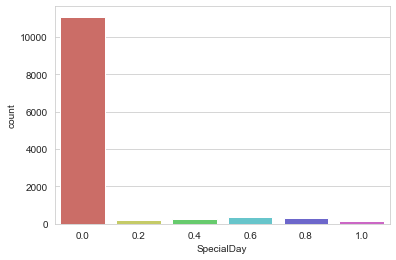

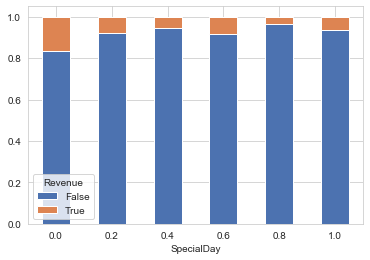

In [7]:
# Special Day
# Discrete Count
sns_plot = sns.countplot(df['SpecialDay'], palette='hls')
sns_plot.figure.savefig('image/03_special_day1.png')

# Percentage of total
chart = pd.crosstab(df['SpecialDay'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)

plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.savefig('image/03_special_day2.png')
plt.show()

### Categorical Variables

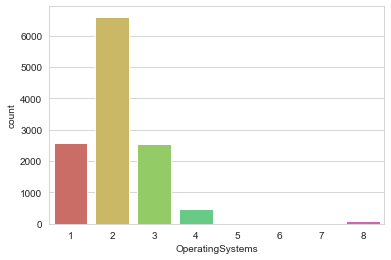

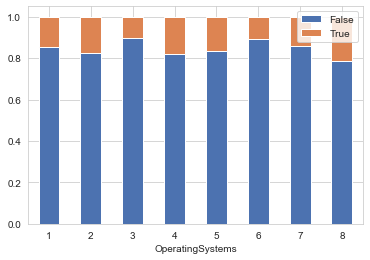

In [8]:
# Operating System
# Discrete Count
sns_plot = sns.countplot(df['OperatingSystems'], palette='hls')
sns_plot.figure.savefig('image/04_operating system1.png')

# Percentage of total
chart = pd.crosstab(df['OperatingSystems'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)

plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.legend(loc='upper right')
plt.savefig('image/04_operating system2.png')
plt.show()

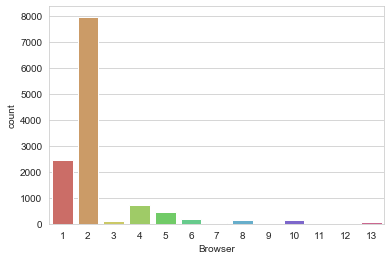

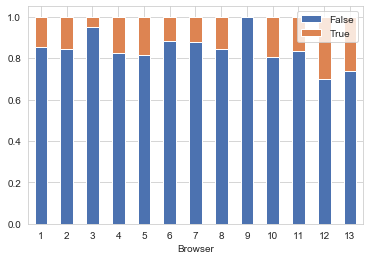

In [9]:
# Browser
# Discrete Count
sns_plot = sns.countplot(df['Browser'], palette='hls')
sns_plot.figure.savefig('image/05_browser system1.png')

# Percentage of total
chart = pd.crosstab(df['Browser'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)

plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.legend(loc='upper right')
plt.savefig('image/05_browser system2.png')
plt.show()

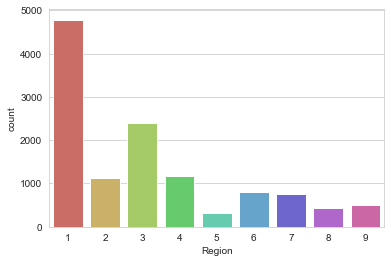

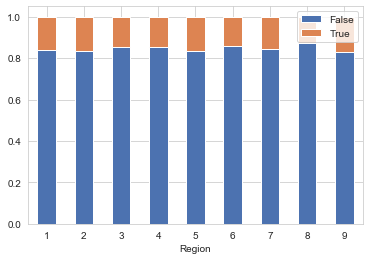

In [10]:
# Region
# Discrete Count
sns_plot = sns.countplot(df['Region'], palette='hls')
sns_plot.figure.savefig('image/06_region1.png')

# Percentage of total
chart = pd.crosstab(df['Region'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)

plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.legend(loc='upper right')
plt.savefig('image/06_region2.png')
plt.show()

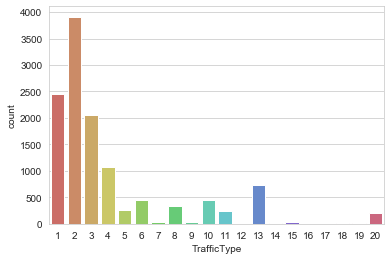

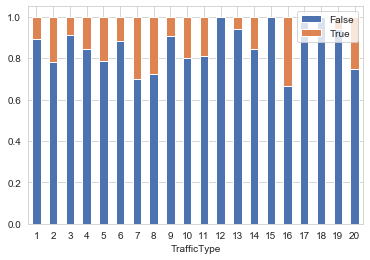

In [11]:
# Traffic Type
# Discrete Count
sns_plot = sns.countplot(df['TrafficType'], palette='hls')
sns_plot.figure.savefig('image/07_traffic_type1.png')

# Percentage of total
chart = pd.crosstab(df['TrafficType'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)

plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.legend(loc='upper right')
plt.savefig('image/07_traffic_type2.png')
plt.show()

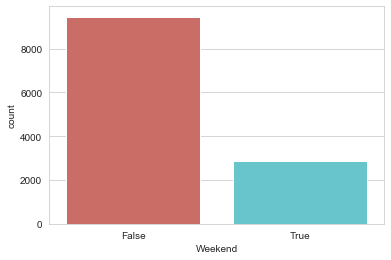

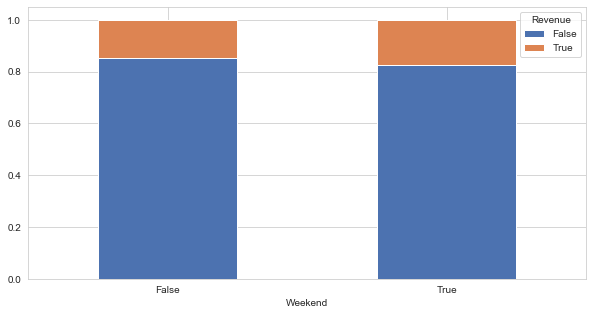


% of purchase on weekend = 17.40%
% of purchase on weekday = 14.89%


In [12]:
# Weekend
# Discrete Count
sns_plot = sns.countplot(df['Weekend'], palette='hls')
sns_plot.figure.savefig('image/08_weekend1.png')

# Percentage of total
chart = pd.crosstab(df['Weekend'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)
plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'), figsize = (10, 5))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.savefig('image/08_weekend2.png')
plt.show()


weekend = int(df.loc[df['Weekend']==True, 'Weekend'].count())
weekday = int(df.loc[df['Weekend']==False, 'Weekend'].count())
weekend_revenue = int(df.loc[(df['Weekend']==True) & (df['Revenue']==True), ['Weekend']].count())
weekday_revenue = int(df.loc[(df['Weekend']==False) & (df['Revenue']==True), ['Weekend']].count())

print('\n% of purchase on weekend = {0:.2%}'.format(weekend_revenue/weekend))
print('% of purchase on weekday = {0:.2%}'.format(weekday_revenue/weekday))

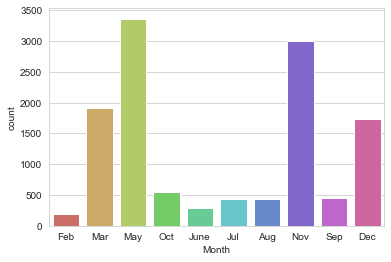

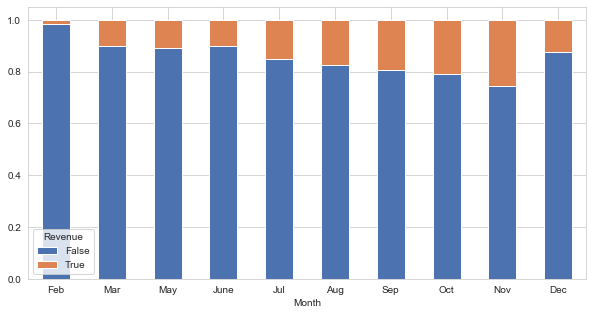

% of purchase in Feb = 1.63%
% of purchase in Mar = 10.07%
% of purchase in May = 10.85%
% of purchase in Jun = 10.07%
% of purchase in Jul = 15.28%
% of purchase in Aug = 17.55%
% of purchase in Sep = 19.20%
% of purchase in Oct = 20.95%
% of purchase in Nov = 25.35%
% of purchase in Dec = 12.51%


In [13]:
# Month
# Discrete Count
sns_plot = sns.countplot(df['Month'], palette='hls')
sns_plot.figure.savefig('image/09_month1.png')

# Percentage of total
order = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
df['Month'] = pd.Categorical(df['Month'], order)
df.sort_values('Month', inplace=True)

chart = pd.crosstab(df['Month'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)
plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'), figsize = (10, 5))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.savefig('image/09_month2.png')
plt.show()


feb = int(df.loc[df['Month']=='Feb', 'Month'].count())
mar = int(df.loc[df['Month']=='Mar', 'Month'].count())
apr = int(df.loc[df['Month']=='Apr', 'Month'].count())
may = int(df.loc[df['Month']=='May', 'Month'].count())
jun = int(df.loc[df['Month']=='June', 'Month'].count())
jul = int(df.loc[df['Month']=='Jul', 'Month'].count())
aug = int(df.loc[df['Month']=='Aug', 'Month'].count())
sep = int(df.loc[df['Month']=='Sep', 'Month'].count())
oct = int(df.loc[df['Month']=='Oct', 'Month'].count())
nov = int(df.loc[df['Month']=='Nov', 'Month'].count())
dec = int(df.loc[df['Month']=='Dec', 'Month'].count())

feb_rev = int(df.loc[(df['Month']=='Feb') & (df['Revenue']==True), 'Month'].count())
mar_rev = int(df.loc[(df['Month']=='Mar') & (df['Revenue']==True), 'Month'].count())
apr_rev = int(df.loc[(df['Month']=='Apr') & (df['Revenue']==True), 'Month'].count())
may_rev = int(df.loc[(df['Month']=='May') & (df['Revenue']==True), 'Month'].count())
jun_rev = int(df.loc[(df['Month']=='June') & (df['Revenue']==True), 'Month'].count())
jul_rev = int(df.loc[(df['Month']=='Jul') & (df['Revenue']==True), 'Month'].count())
aug_rev = int(df.loc[(df['Month']=='Aug') & (df['Revenue']==True), 'Month'].count())
sep_rev = int(df.loc[(df['Month']=='Sep') & (df['Revenue']==True), 'Month'].count())
oct_rev = int(df.loc[(df['Month']=='Oct') & (df['Revenue']==True), 'Month'].count())
nov_rev = int(df.loc[(df['Month']=='Nov') & (df['Revenue']==True), 'Month'].count())
dec_rev = int(df.loc[(df['Month']=='Dec') & (df['Revenue']==True), 'Month'].count())

print('% of purchase in Feb = {0:.2%}'.format(feb_rev/feb))
print('% of purchase in Mar = {0:.2%}'.format(mar_rev/mar))
# print('% of purchase in Apr = {0:.2%}'.format(apr_rev/apr))
print('% of purchase in May = {0:.2%}'.format(may_rev/may))
print('% of purchase in Jun = {0:.2%}'.format(jun_rev/jun))
print('% of purchase in Jul = {0:.2%}'.format(jul_rev/jul))
print('% of purchase in Aug = {0:.2%}'.format(aug_rev/aug))
print('% of purchase in Sep = {0:.2%}'.format(sep_rev/sep))
print('% of purchase in Oct = {0:.2%}'.format(oct_rev/oct))
print('% of purchase in Nov = {0:.2%}'.format(nov_rev/nov))
print('% of purchase in Dec = {0:.2%}'.format(dec_rev/dec))

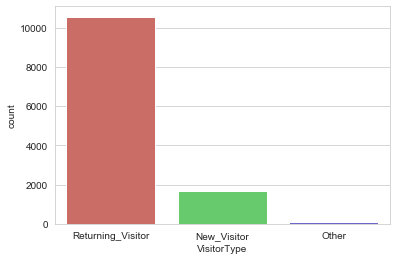

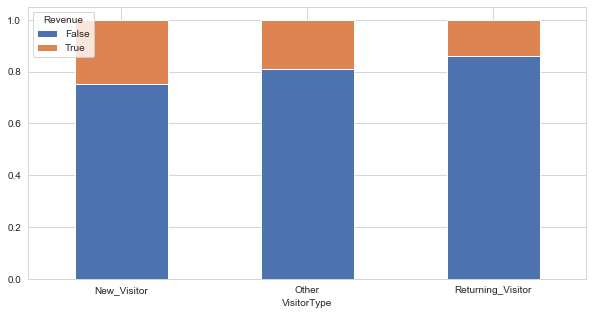

% of returning visitor = 86%
% of new visitor = 14%
% of other visitor = 1%

% of purchase for returning visitor = 13.93%
% of purchase for new visitor = 24.91%


In [14]:
# Visitor Type
# Discrete Count
sns_plot = sns.countplot(df['VisitorType'], palette='hls')
sns_plot.figure.savefig('image/10_VisitorType1.png')

# Percentage of total
chart = pd.crosstab(df['VisitorType'], df['Revenue'])
chart = chart.div(chart.sum(1).astype(float), axis = 0)
plot = chart.plot(kind = 'bar', stacked = True, color=sns.color_palette('deep'), figsize = (10, 5))
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plt.savefig('image/10_VisitorType2.png')
plt.show()


total = df.shape[0]
returning_visitor = int(df.loc[df['VisitorType']=='Returning_Visitor', 'VisitorType'].count())
new_visitor = int(df.loc[df['VisitorType']=='New_Visitor', 'VisitorType'].count())
other_visitor = int(df.loc[df['VisitorType']=='Other', 'VisitorType'].count())
returning_visitor_revenue = int(df.loc[(df['VisitorType']=='Returning_Visitor') & (df['Revenue']==True), ['VisitorType']].count())
new_visitor_revenue = int(df.loc[(df['VisitorType']=='New_Visitor') & (df['Revenue']==True), ['VisitorType']].count())

print('% of returning visitor = {0:.0%}'.format(returning_visitor/total))
print('% of new visitor = {0:.0%}'.format(new_visitor/total))
print('% of other visitor = {0:.0%}'.format(other_visitor/total))

print('\n% of purchase for returning visitor = {0:.2%}'.format(returning_visitor_revenue/returning_visitor))
print('% of purchase for new visitor = {0:.2%}'.format(new_visitor_revenue/new_visitor))

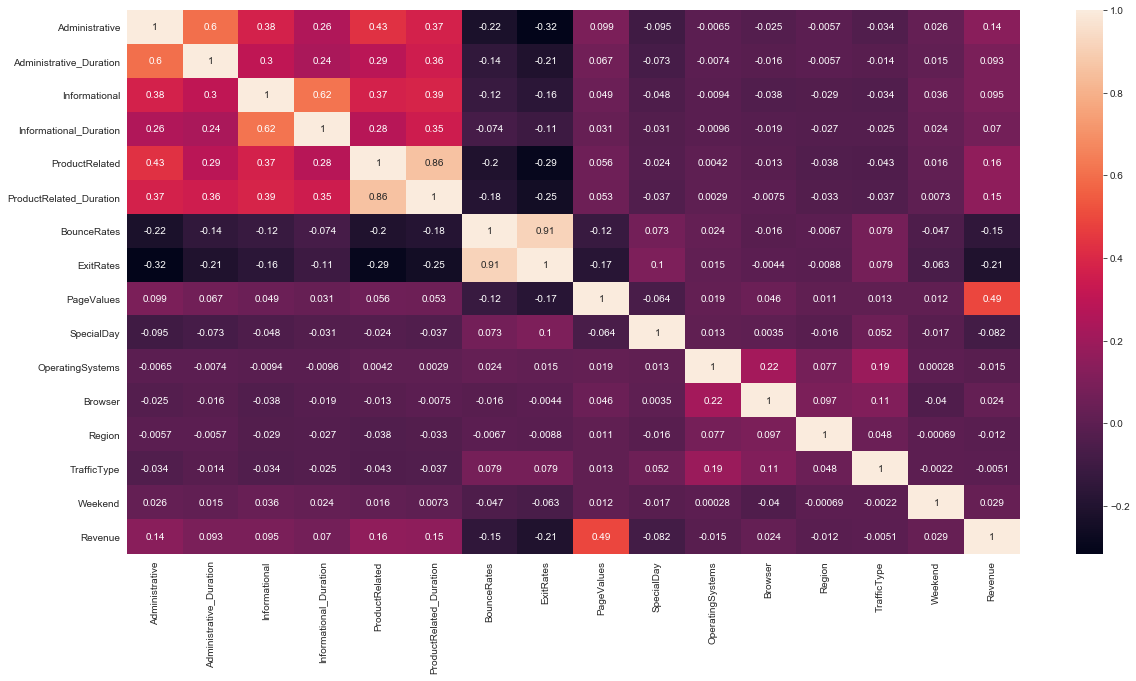

In [15]:
# correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.savefig('image/correlation_plot.png')


In [16]:
train, test = train_test_split(df, test_size=0.2,random_state = 42)
print(train.shape)
print(test.shape)

(9864, 18)
(2466, 18)
